In [26]:
# %load Pipeline_logistic_reg_v2.py
import pandas as pd
import numpy as np
import seaborn as sns
from Clean_Fun import *
from Meta_fun import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# %% Load dataset
df=pd.read_csv('Data/after_merge.csv',index_col=0)
# %% test patients, determing Response Value
pd.set_option('display.max_columns', 60)

df=meta_clean(df)
#df[keep_cols].isnull().sum()

df=df[df['outcome']!=2]
# %%
# load the columns I want to keep while modelling
df.columns
column_dict=read_pkl('Models/model_columns2.pkl')
keep_cols=column_dict['keep_cols']
pat_cols=column_dict['pat_cols']




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
EF less than 0 set to None
Couldn't extract EF so set to na_val
51 (30 -35)
Imputing 121.0,242.0 from other column
Imputing 90.0,180.0 from other column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
Imputing 134,80 from Blood Pressure Column
Imputing 116,73 from Blood Pressure Column
num missing 386
value counts before zero and one assignment: 0                                                      386
lisinopril 5mg qd                                       42
none                                                    37
lisinopril 2.5mg qd                                     34
losartan 50mg qd                               

zero values: ['none', 'milrinone lactate in dextros solution 40-5 mg/200ml%', 'milrinone lactate solution use 0.15 mcg/kg iv per minute to run at 4.4ml/hr', 'no cardiac meds available on the record', '12/26: no med records in "orders" pointclickcare', 'no cardiac meds on the record', 'no orders found on the record']
Values set to 1.0: 
 ['hydralazine 25mg q12h', 'amiodarone 100mg qd, amlodipine 5mg qd', 'amiodarone 400mg qd', 'amlodipine 10mg qd, isosorbide din 10mg tid, hydralazine 25mg q8h, crestor 40mg hs', 'amiodarone 200mg qd, atorvastatin 40mg qd', 'amlodipine 5mg qd, hydralazine 25mg q8h,isosorbide din 10mg *0.5tab tid', 'amiodarone 200mg q12h, isosorbide mono 60mg qd, hydralazine 25mg q8h, lipitor 40mg qd', 'norvasc 10 mg tablet sig: give 1 tablet (10 mg) by oral route once daily,', 'atorvastatin 40 mg qd', 'amlodipine 5mg qd, atorvastatin 20mg qd', 'atorvastatin 20mg qd, hydralazine 25mg q8h, isosorbide din 10mg tid', 'hydralazine 100mg q8h, nifedipine 60mg*2tab qd, atorvastat

removing invalid row: 0

patient_link                             n0EPhlbX
enrollId                               n0EPhlbX_3
Enrollment_Date                               NaN
name                                 1 Tester, Mv
create_user        notifications@providerloop.com
Name: 0, dtype: object
--------------------------------------------------

 
 Dropped 1 rows from the dataset
New size of dataset: (773, 54)
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcome to 2 for patients that have been discharged but we don't have a status on them
Setting outcom

In [7]:
df1=df[['patient_gender','ef', 'weight', 'this_weight_change_frac', 'weight_change_since_admit_frac', 'bnp', 'this_bnp_change', 'ace','bb','diuretics','anticoagulant','ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age']]

# Weight change frac before imputation and transformation

In [ ]:
sns.set(font_scale=2)
#df1[df1['outcome']==1.0]['this_weight_change_frac'].hist(figsize=(10,10))
df1[df1['outcome']==0.0]['this_weight_change_frac'].hist(figsize=(10,10))

# EF before imputation and transformation

In [ ]:
sns.set(font_scale=2)
df1[df1['outcome']==1.0]['ef'].hist(figsize=(10,10))
#df1[df1['outcome']==0.0]['ef'].hist(figsize=(10,10))

# Correlation Matrix before 

In [ ]:
import seaborn as sns
sns.set(font_scale=7)
corrmat = df1.corr()
plt.subplots(figsize=(60,50))
sns.heatmap(corrmat)

# Imputation

In [27]:
final_imputation(df)

Successfully imputed for all missing values


# EF after Imputation

In [ ]:
sns.set(font_scale=2)
#df[df['outcome']==1.0]['ef'].hist(figsize=(10,10))
df[df['outcome']==0.0]['ef'].hist(figsize=(10,10))

# Distributions on EF, Weight , BNP, CR, Potassium before Transformation

count    753.000000
mean       0.484715
std        0.132362
min        0.100000
25%        0.425000
50%        0.500000
75%        0.550000
max        0.820000
Name: ef, dtype: float64

 mu = 0.47 and sigma = 0.13



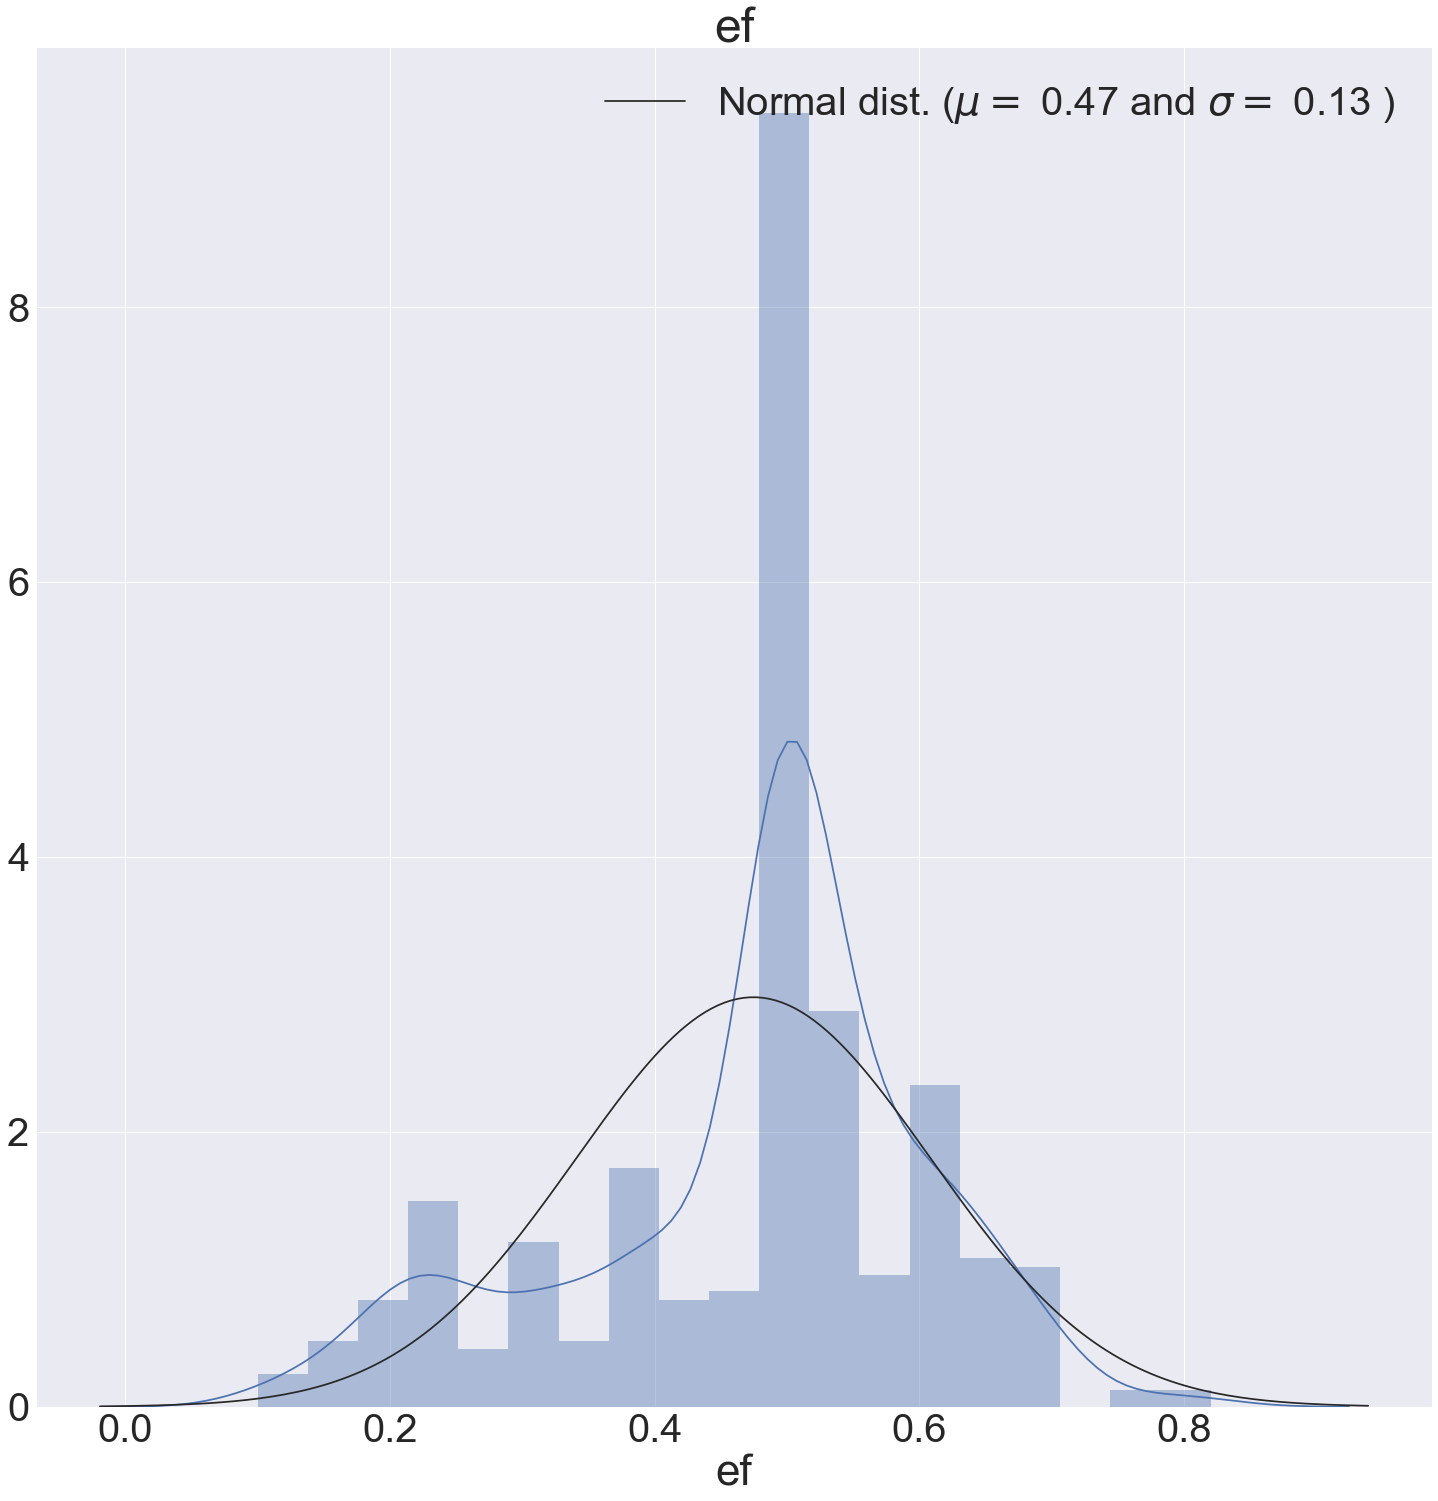

count    753.000000
mean     169.978300
std       57.444012
min       71.200000
25%      132.000000
50%      158.000000
75%      194.600000
max      468.000000
Name: weight, dtype: float64

 mu = 168.32 and sigma = 54.29



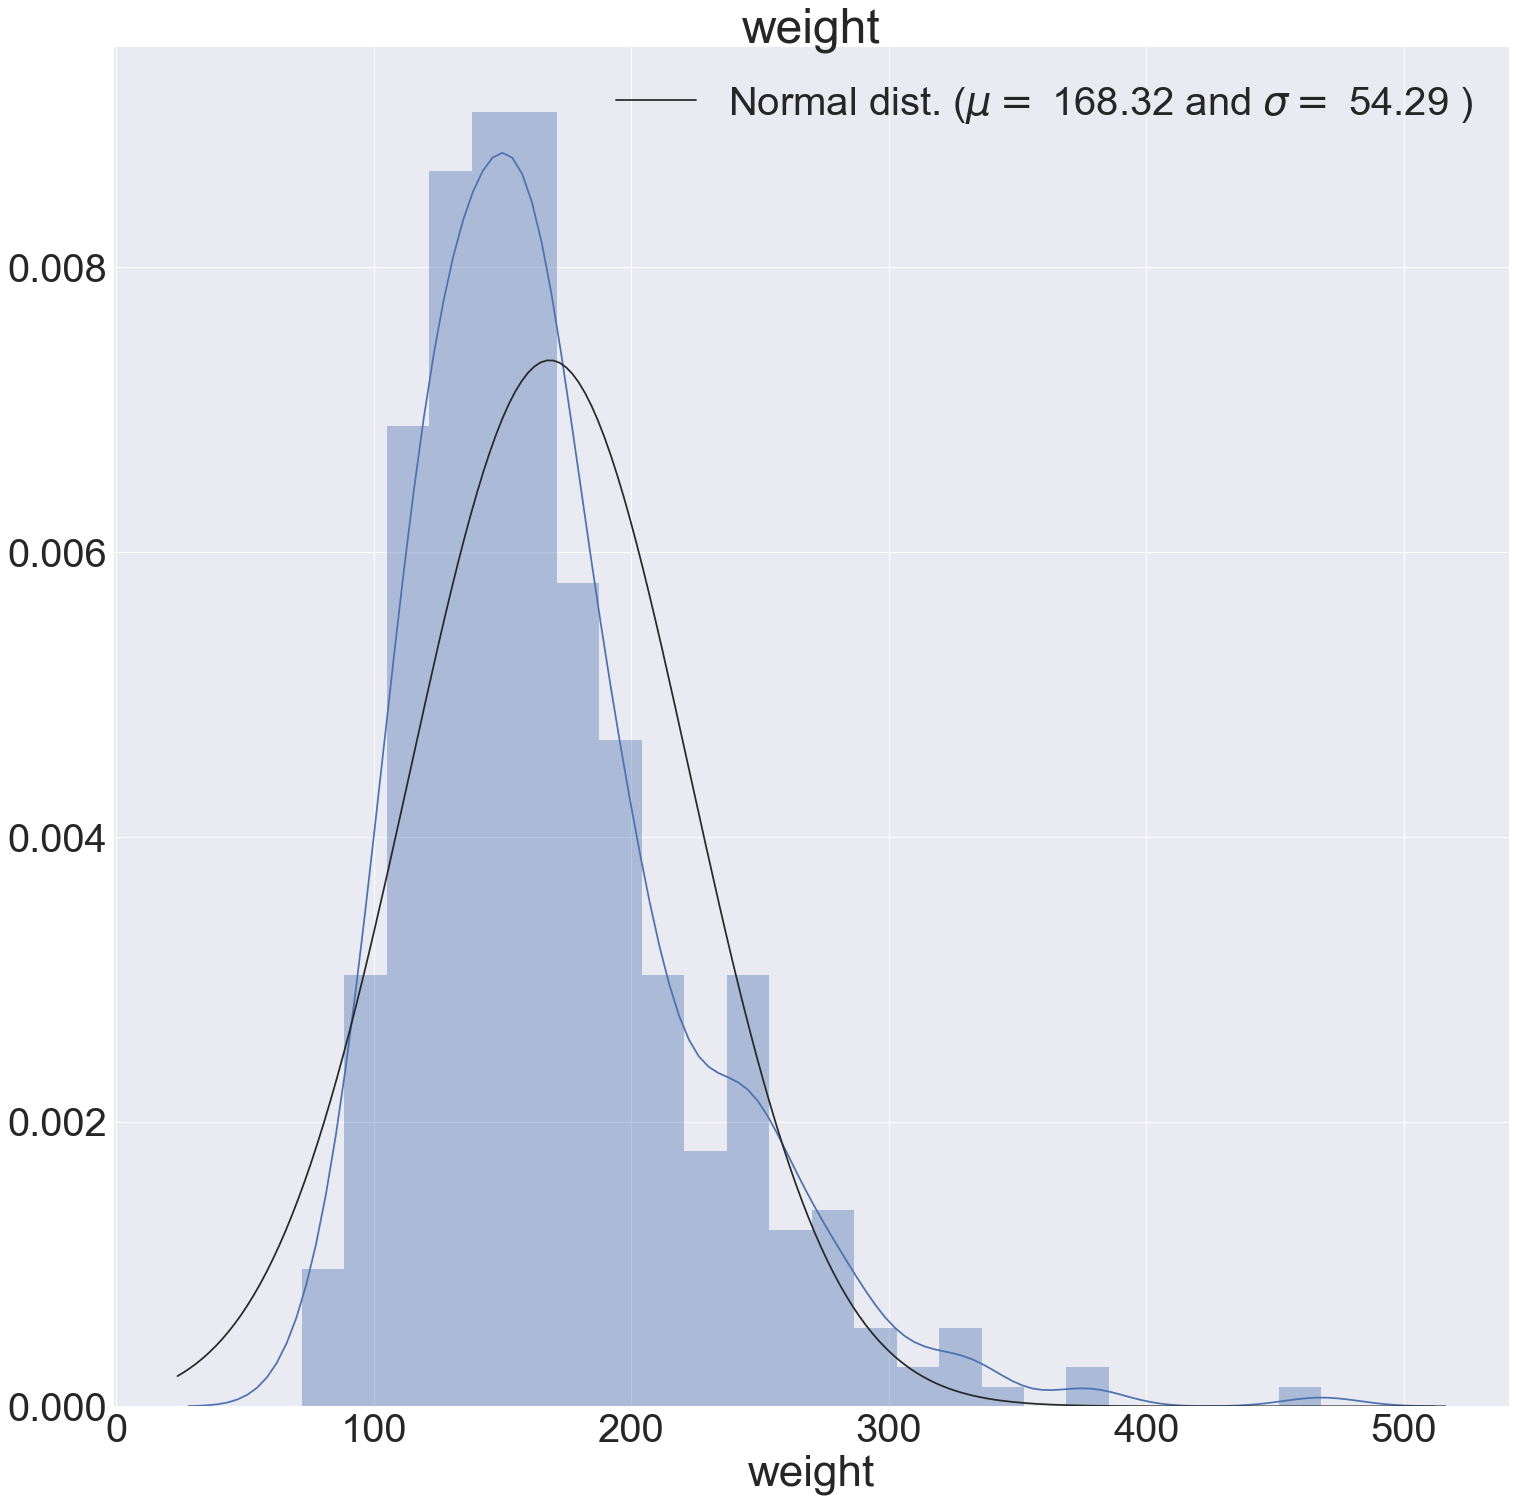

count      753.000000
mean       682.480717
std       2725.432485
min          1.990000
25%         76.000000
50%        235.000000
75%        579.000000
max      68432.000000
Name: bnp, dtype: float64

 mu = 851.36 and sigma = 3494.30



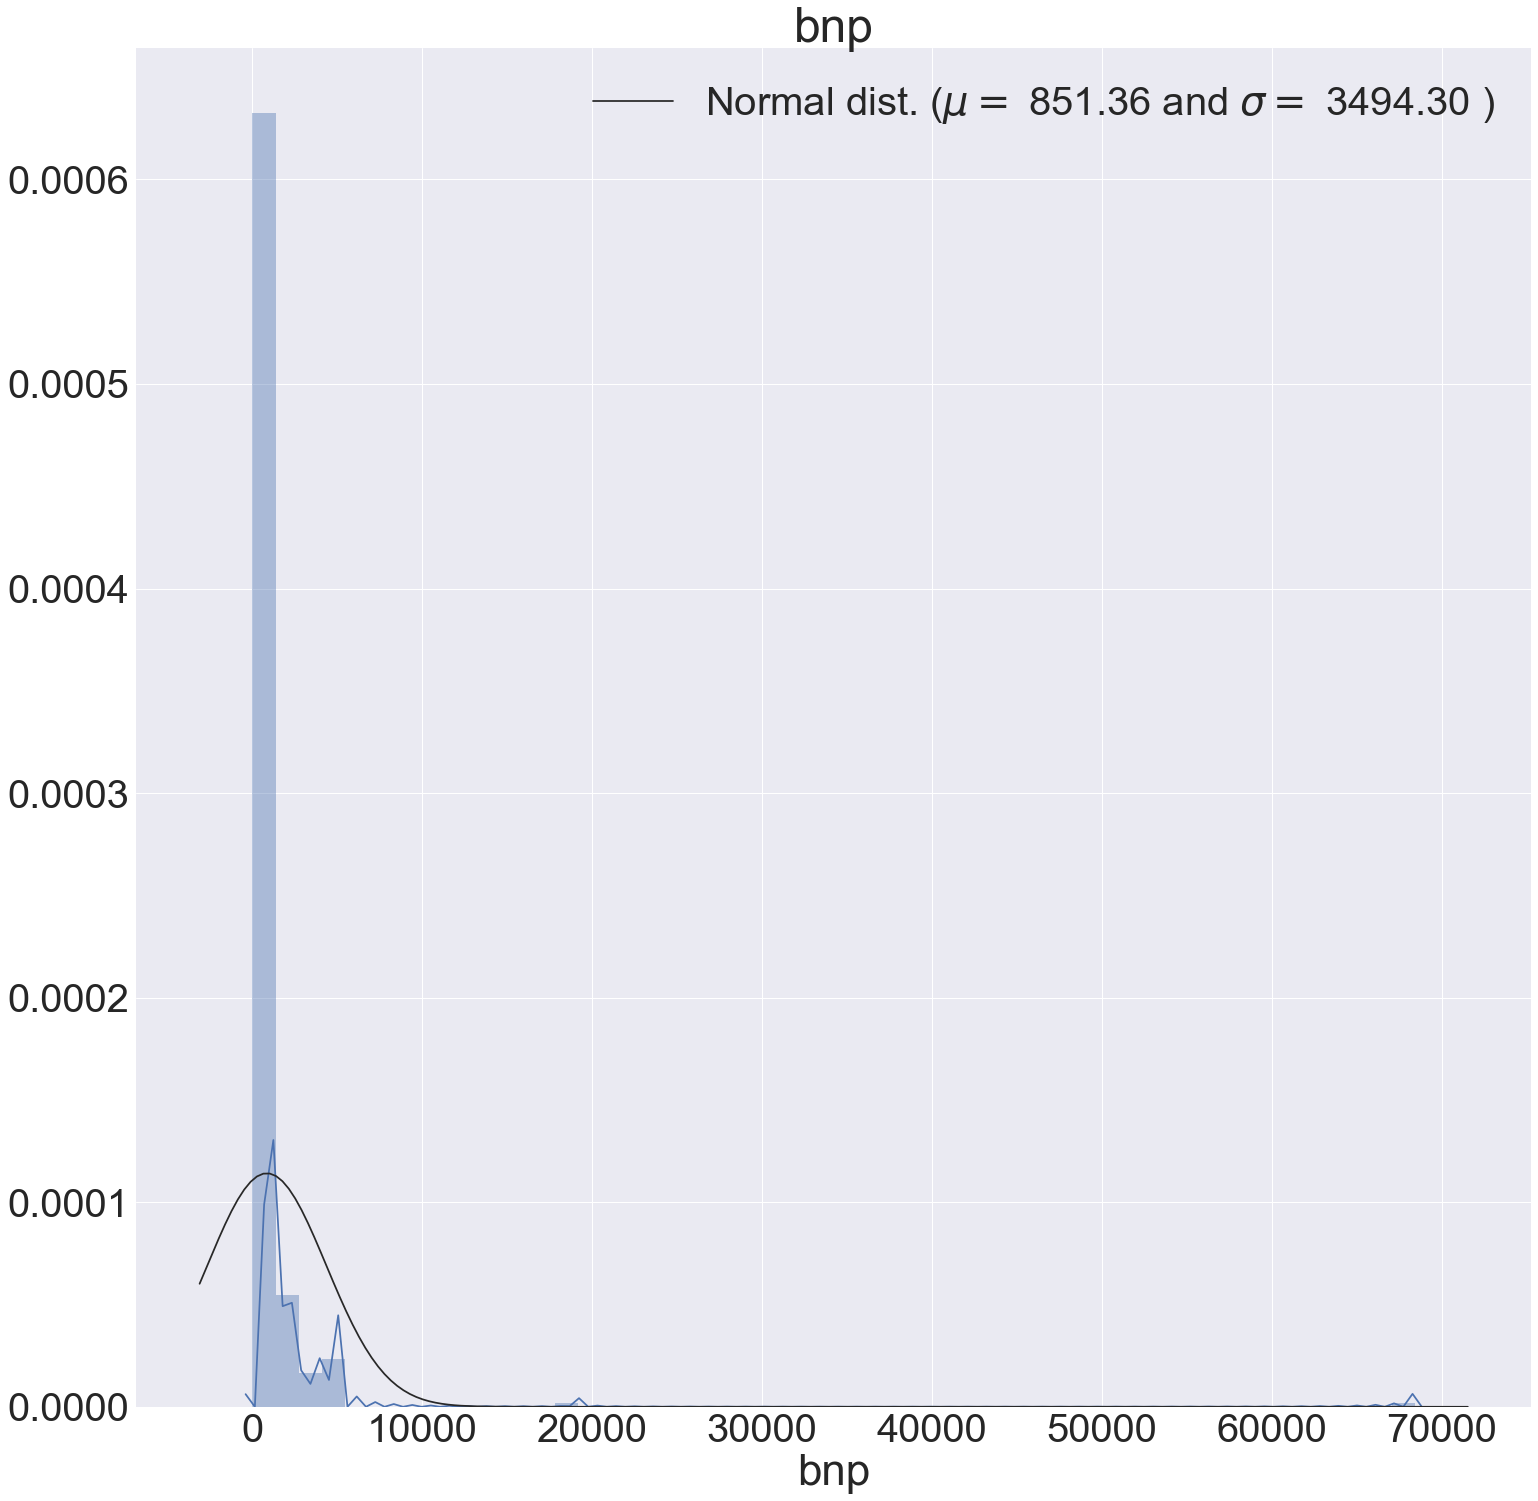

count    753.000000
mean      34.325365
std       21.285524
min        8.000000
25%       19.000000
50%       28.000000
75%       43.000000
max      205.000000
Name: bun, dtype: float64

 mu = 36.26 and sigma = 23.22



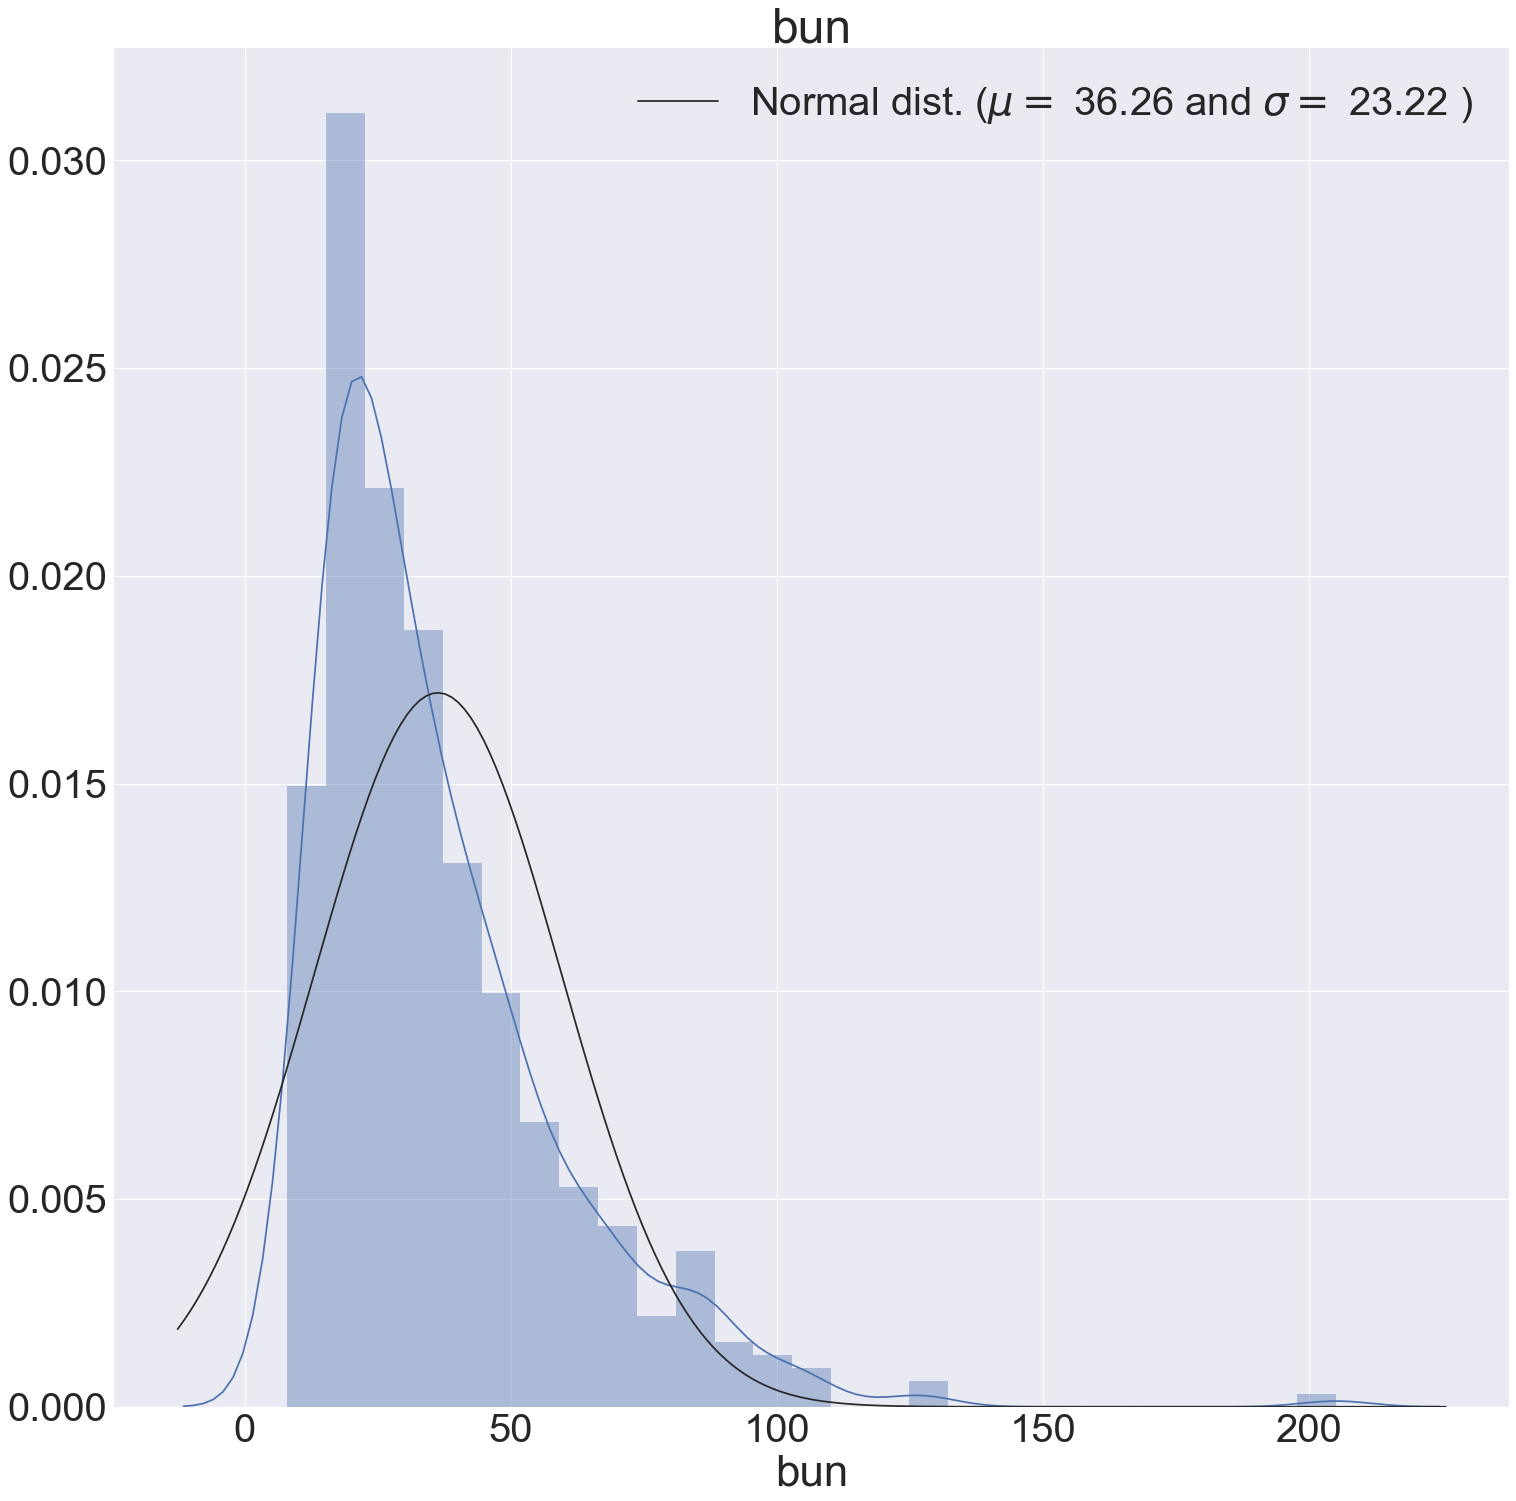

count    753.000000
mean       1.542961
std        1.352756
min        0.200000
25%        0.800000
50%        1.100000
75%        1.600000
max        9.100000
Name: cr, dtype: float64

 mu = 1.66 and sigma = 1.51



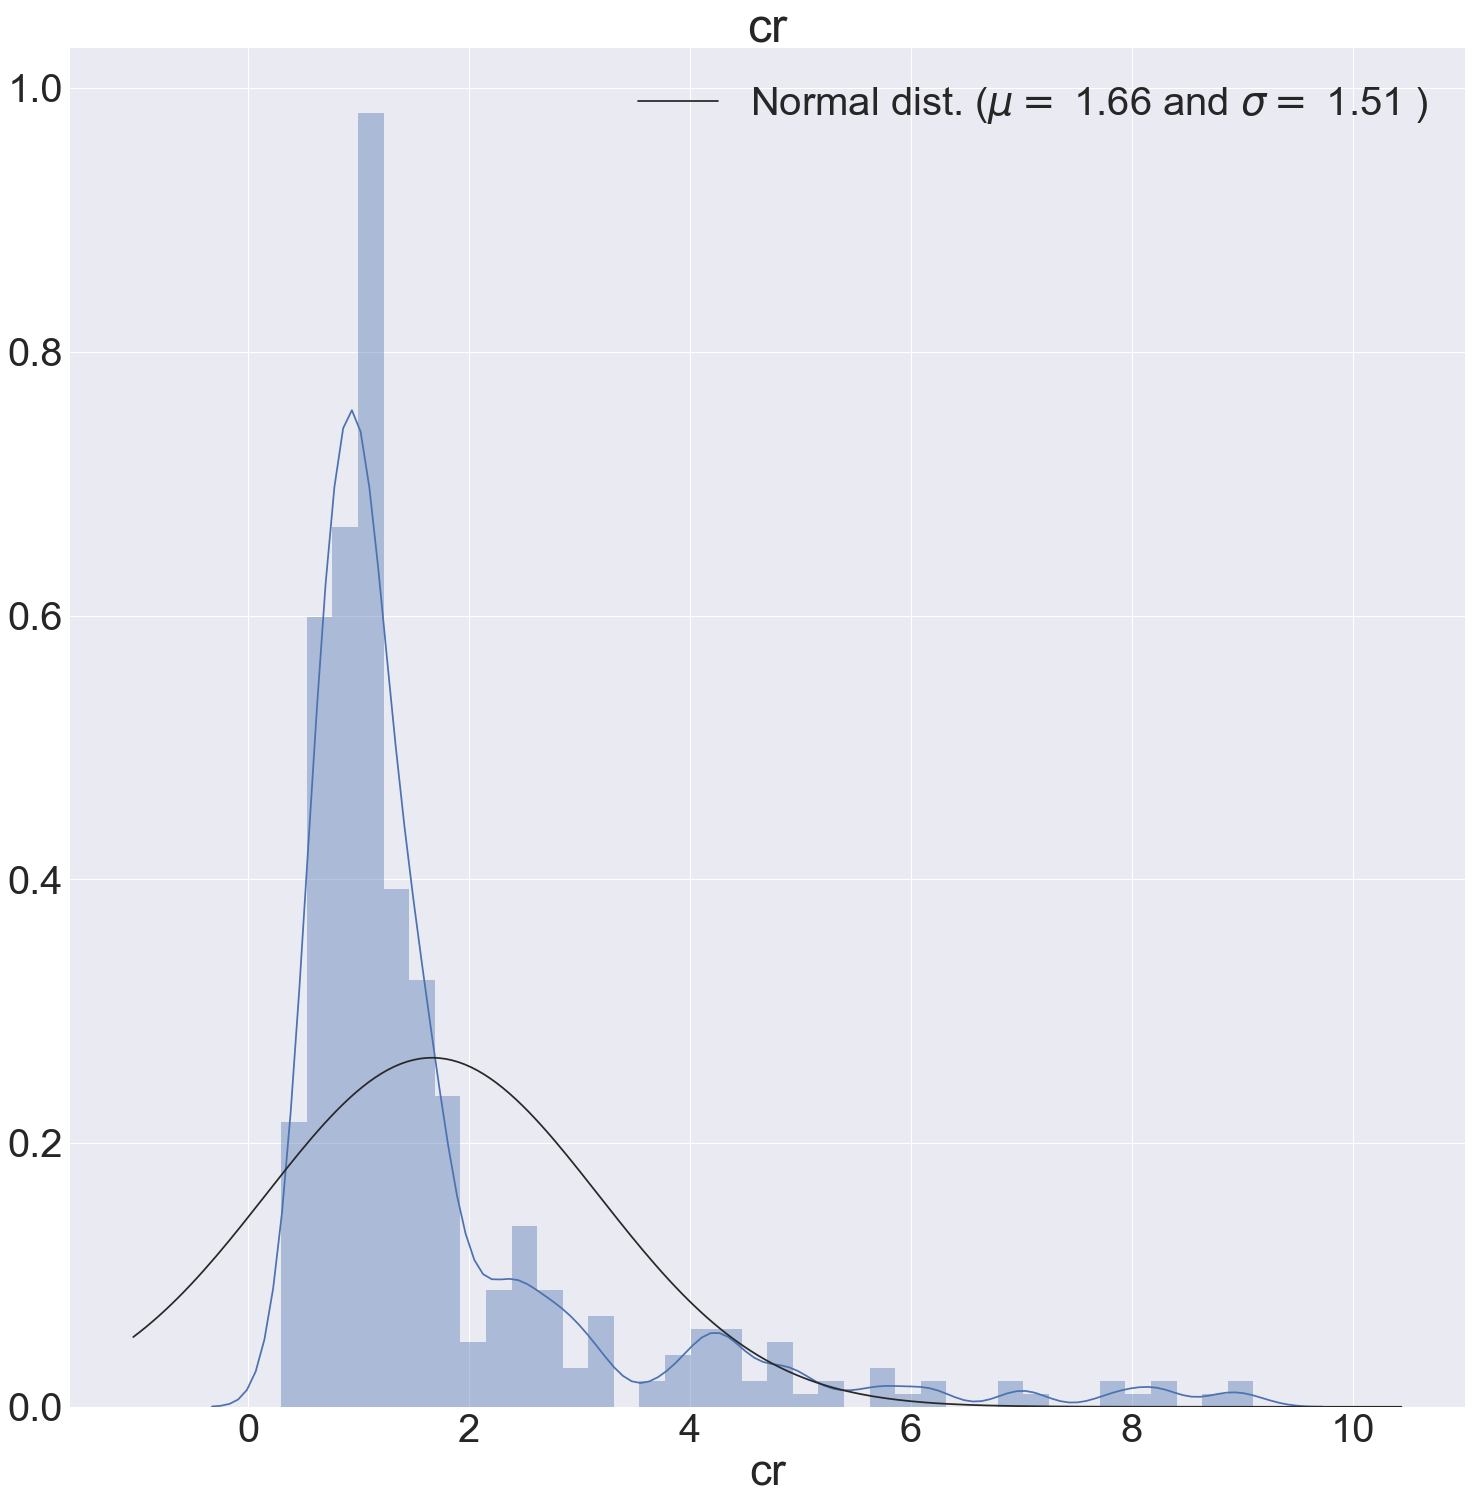

count    753.000000
mean       4.420452
std        0.602571
min        2.000000
25%        4.000000
50%        4.400000
75%        4.800000
max        7.500000
Name: potasium, dtype: float64

 mu = 4.46 and sigma = 0.64



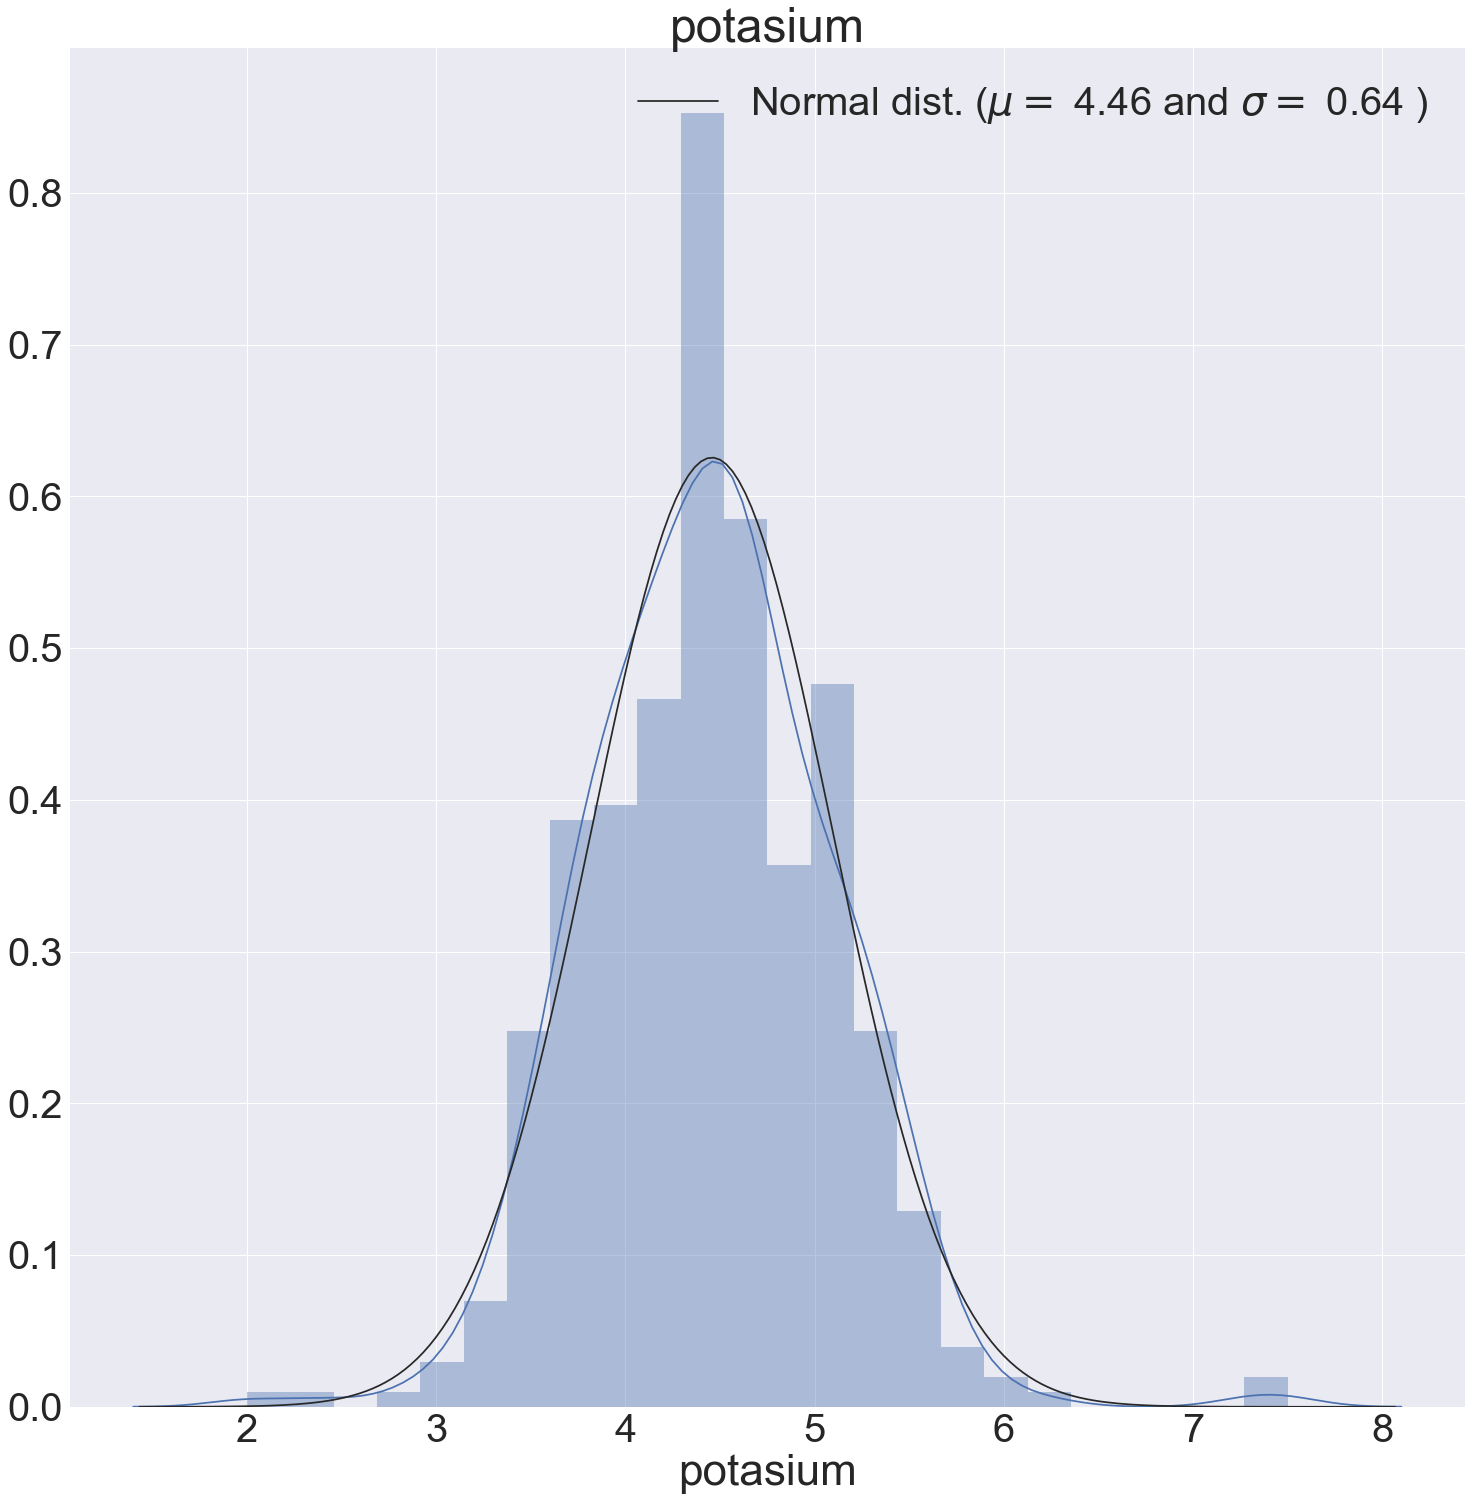

In [29]:
#Distribution before log trans
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=4)

cols=['ef', 'weight', 'bnp','bun', 'cr', 'potasium']
for col in cols:
    plt.figure(figsize=(25, 25))
    print(df[col].describe())
    sns.distplot(train(df)[col] , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train(df)[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.title(str(col))
    plt.show()
# %%



In [12]:

# we have 47 duration and 12 acute/chronic that we are currently dropping
df[keep_cols].isnull().sum()

###### any transformations will go here ########
log_cols=['ef', 'weight', 'bnp','bun', 'cr', 'potasium']
df[log_cols].isnull().sum()


ef          0
weight      0
bnp         0
bun         0
cr          0
potasium    0
dtype: int64

# Distribution on EF, Weight , BNP, CR, Potassium with Log Transformation

count    753.000000
mean       0.908699
std        0.054458
min        0.741937
25%        0.885832
50%        0.916291
75%        0.936093
max        1.036737
Name: ef, dtype: float64

 mu = 0.90 and sigma = 0.06



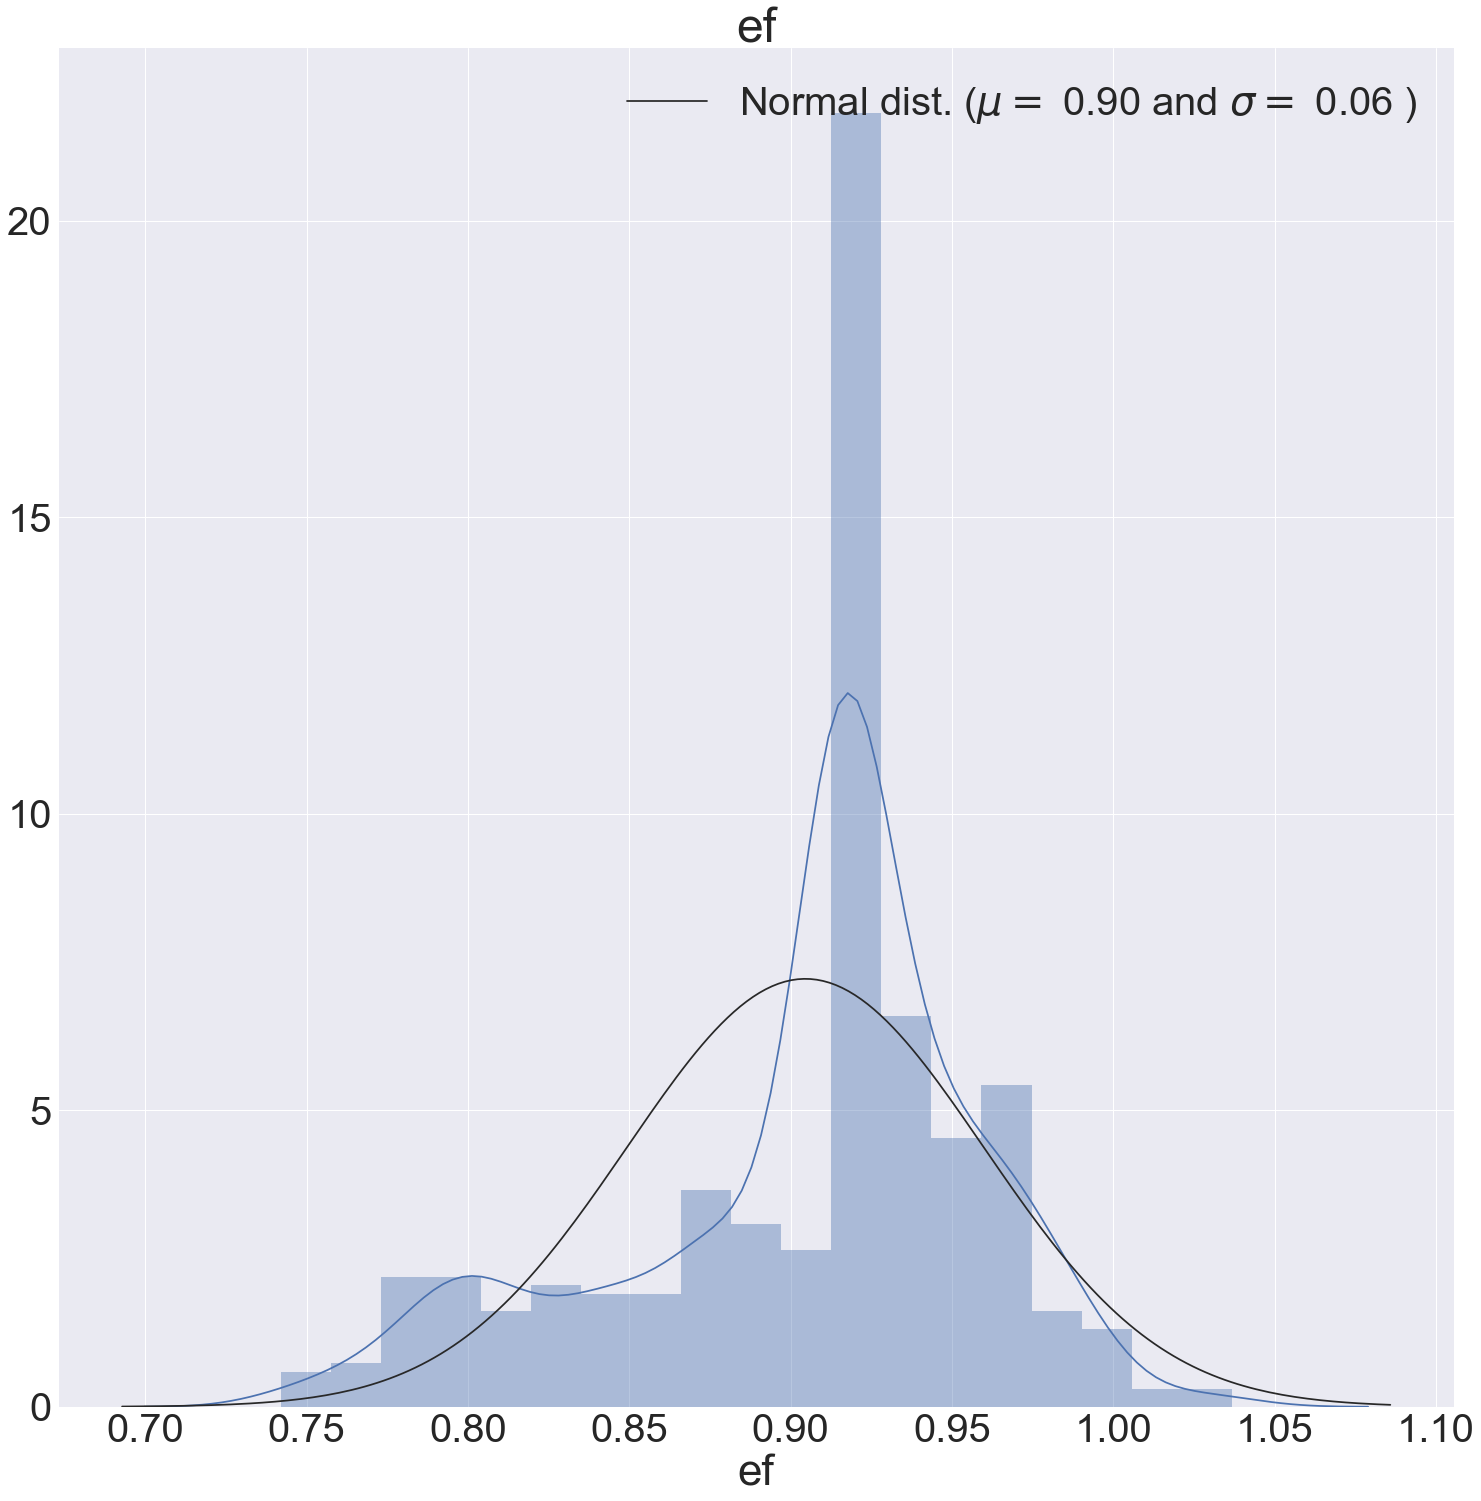

count    753.000000
mean       5.098200
std        0.307923
min        4.293195
25%        4.897840
50%        5.075174
75%        5.281171
max        6.152733
Name: weight, dtype: float64

 mu = 5.09 and sigma = 0.30



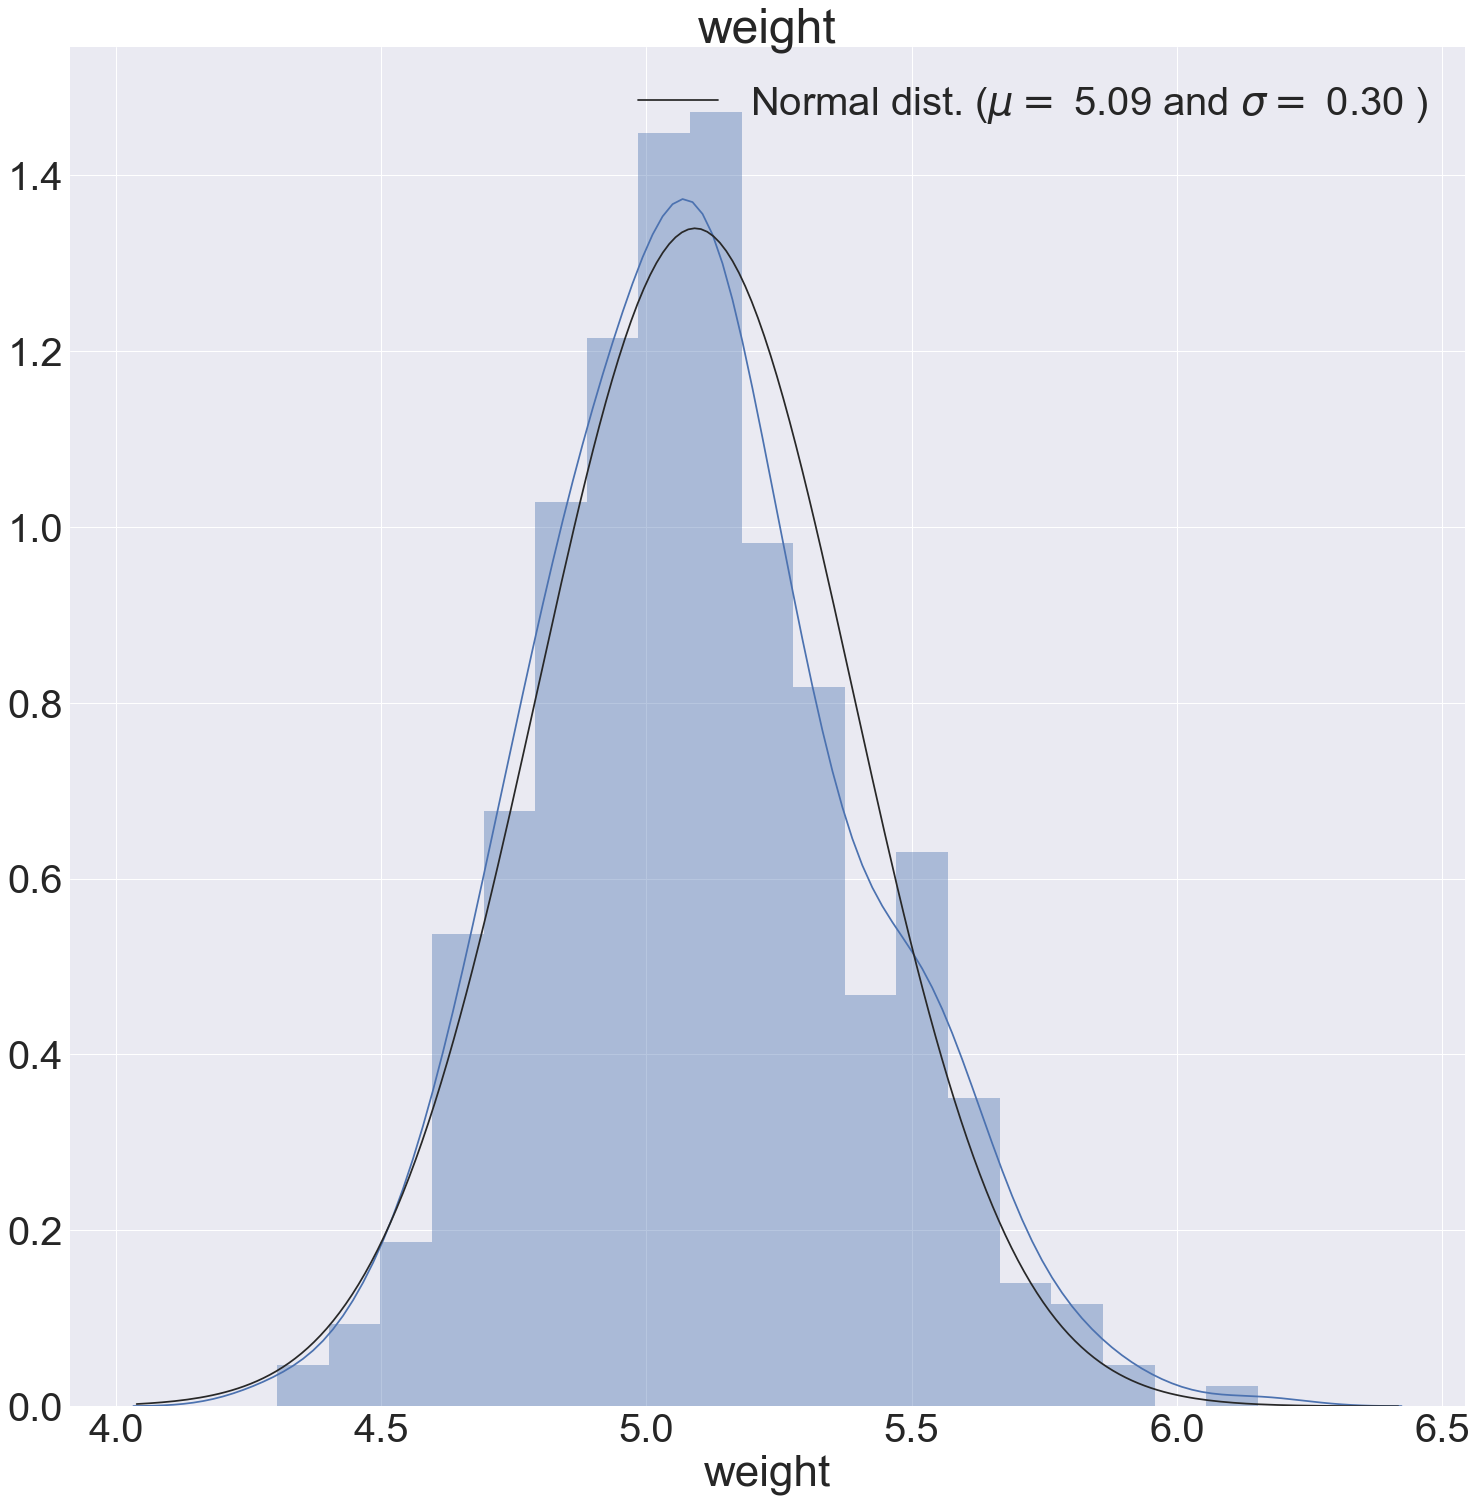

count    753.000000
mean       5.394716
std        1.494684
min        1.383791
25%        4.356709
50%        5.468060
75%        6.364751
max       11.133625
Name: bnp, dtype: float64

 mu = 5.60 and sigma = 1.47



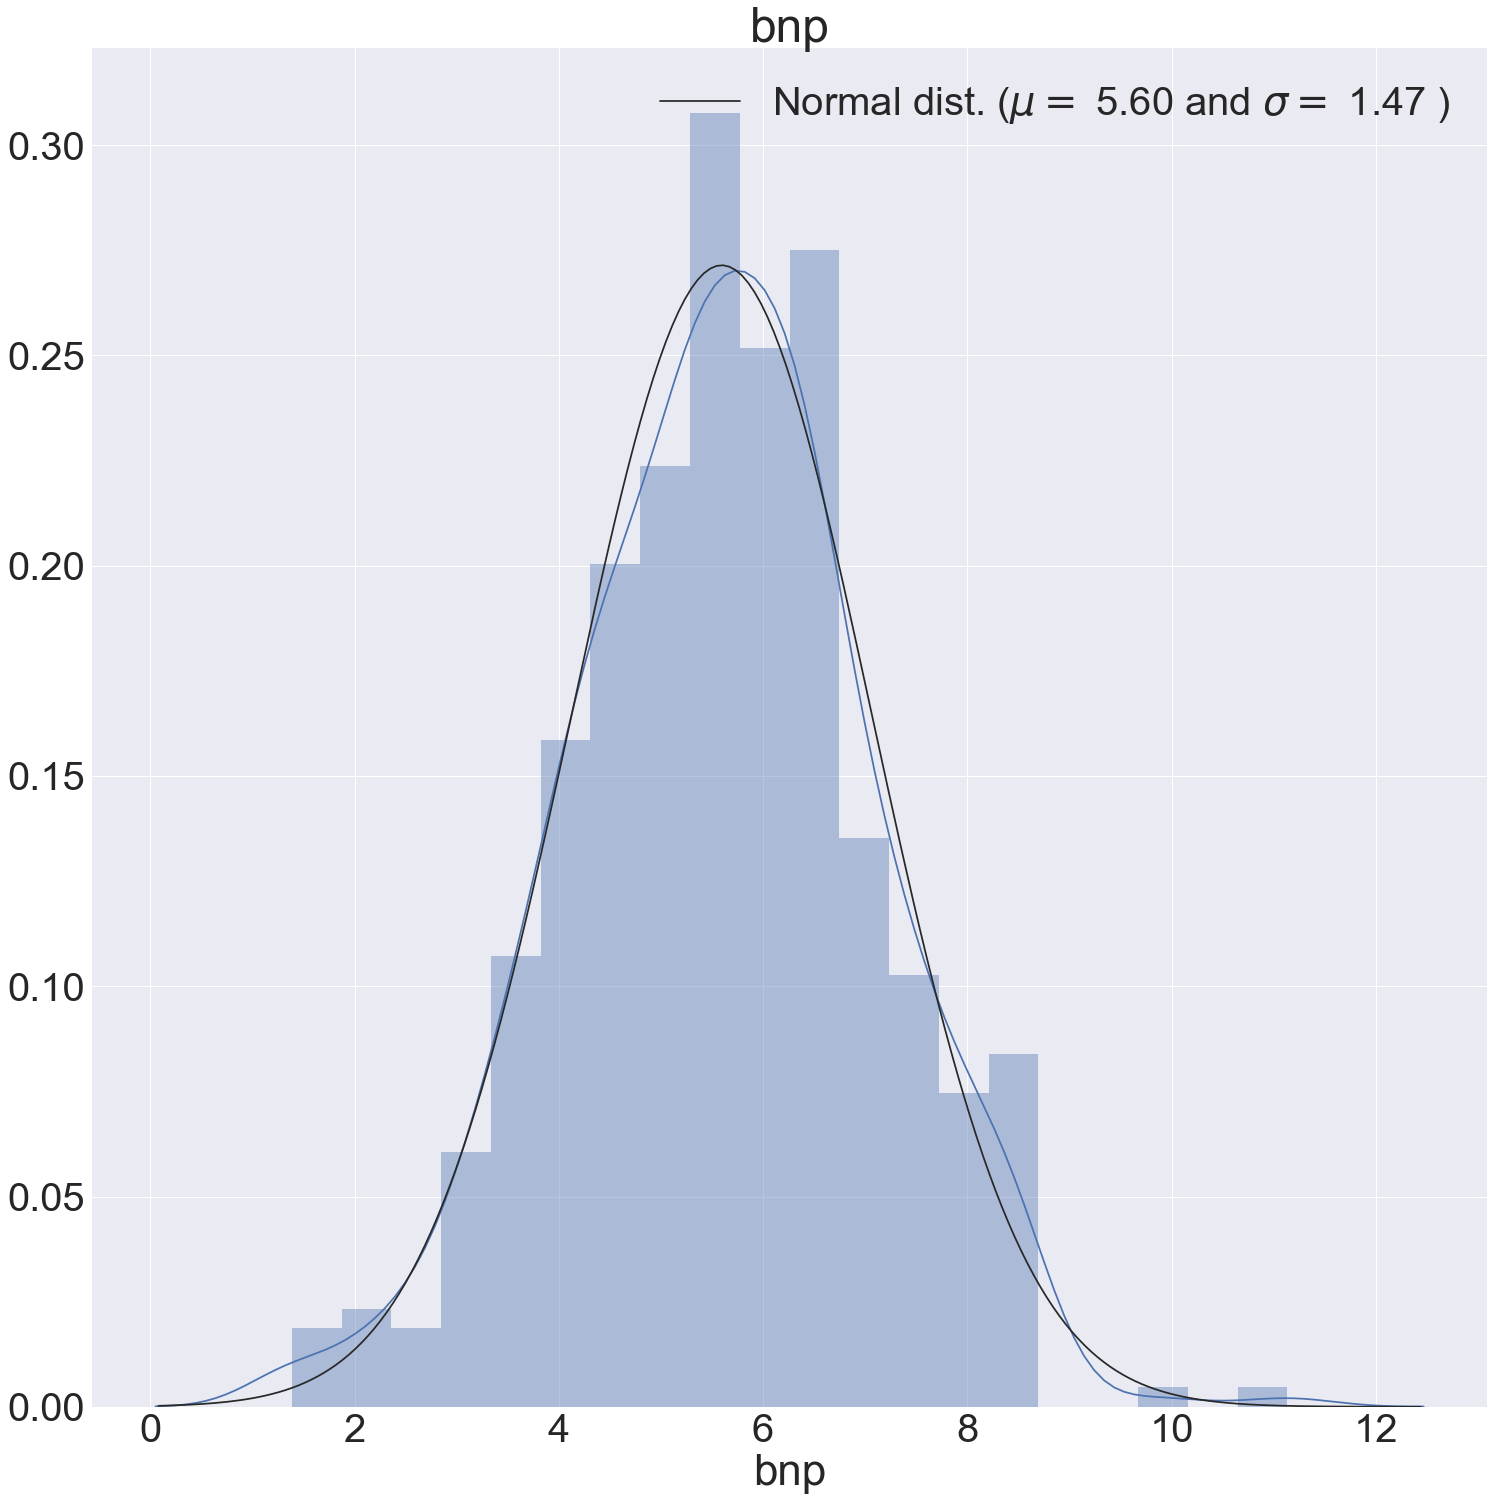

count    753.000000
mean       3.451015
std        0.520317
min        2.302585
25%        3.044522
50%        3.401197
75%        3.806662
max        5.332719
Name: bun, dtype: float64

 mu = 3.49 and sigma = 0.54



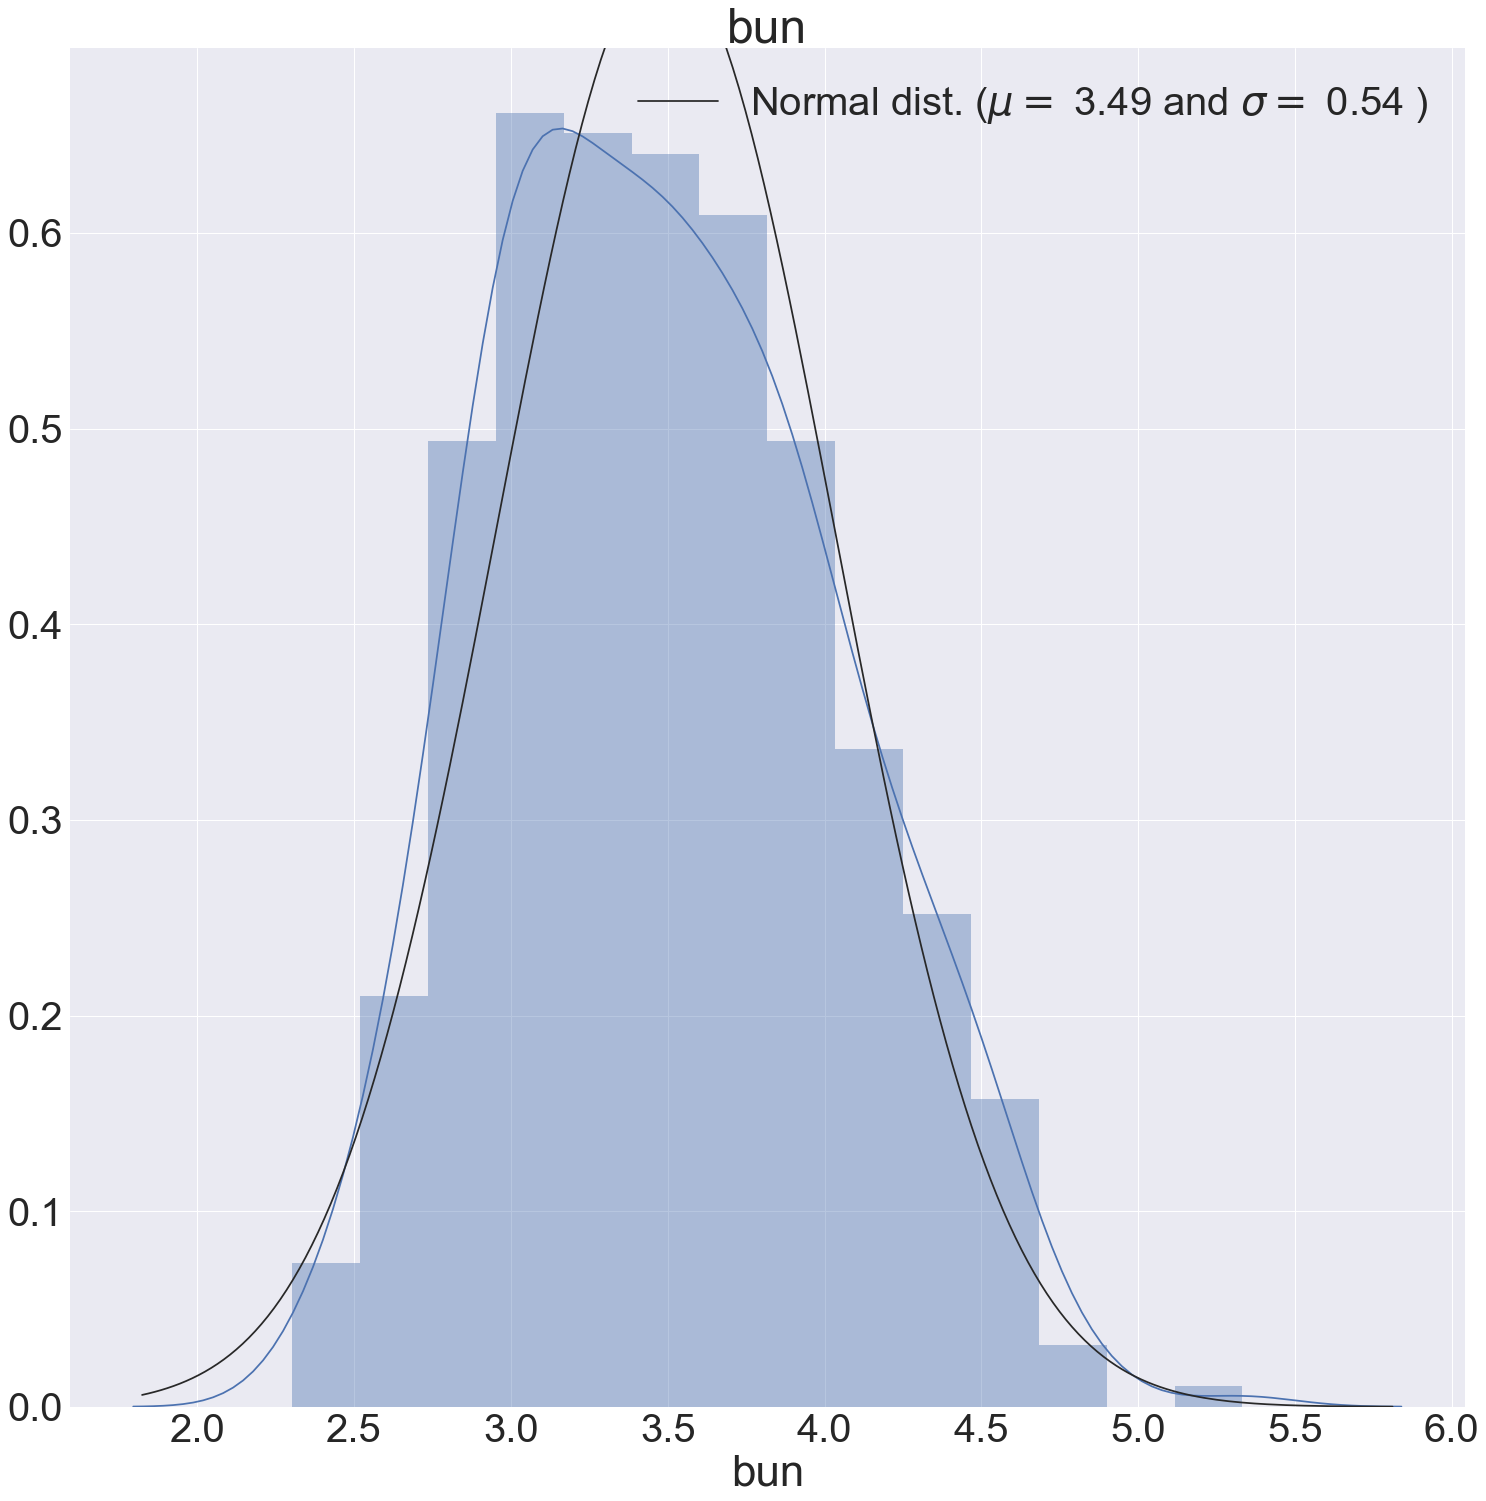

count    753.000000
mean       1.216267
std        0.285494
min        0.788457
25%        1.029619
50%        1.131402
75%        1.280934
max        2.406945
Name: cr, dtype: float64

 mu = 1.24 and sigma = 0.31



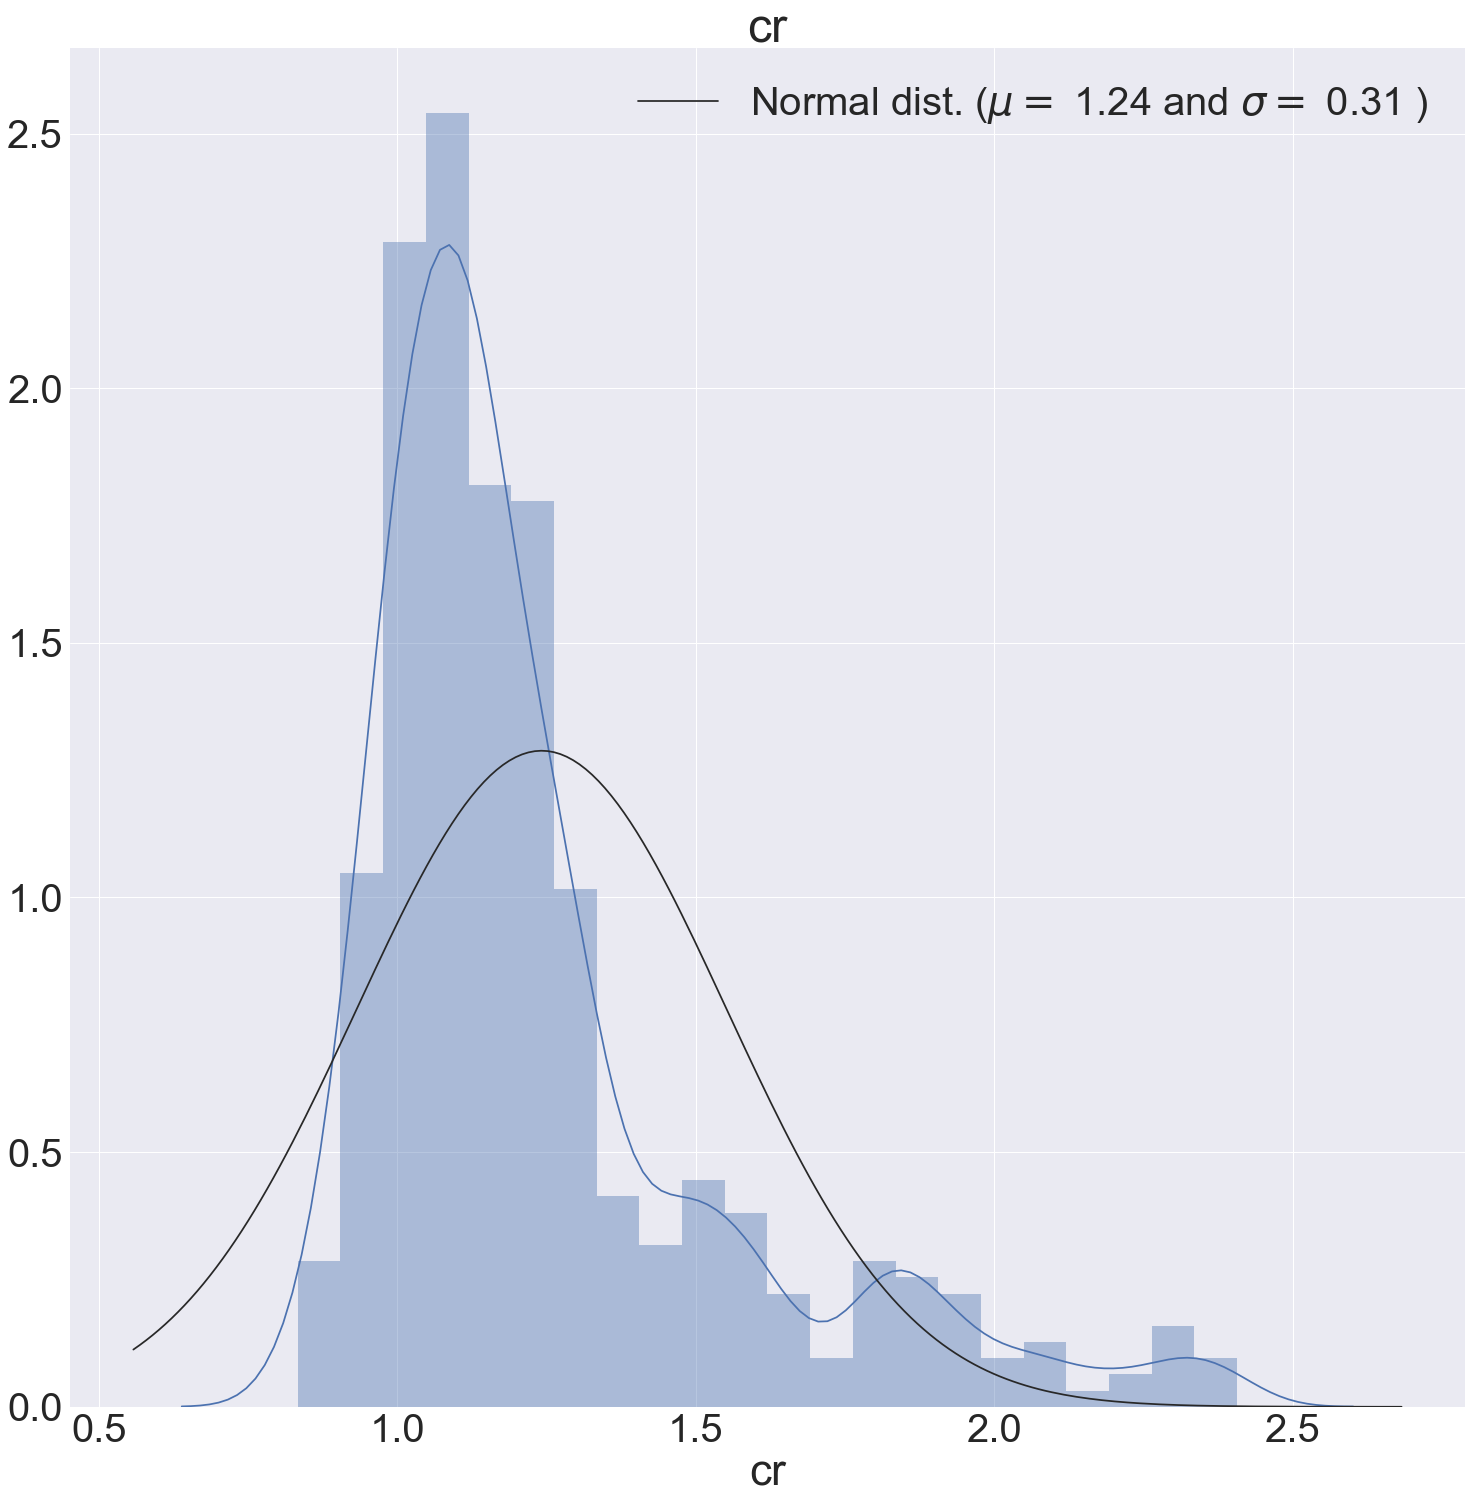

count    753.000000
mean       1.855091
std        0.094029
min        1.386294
25%        1.791759
50%        1.856298
75%        1.916923
max        2.251292
Name: potasium, dtype: float64

 mu = 1.86 and sigma = 0.10



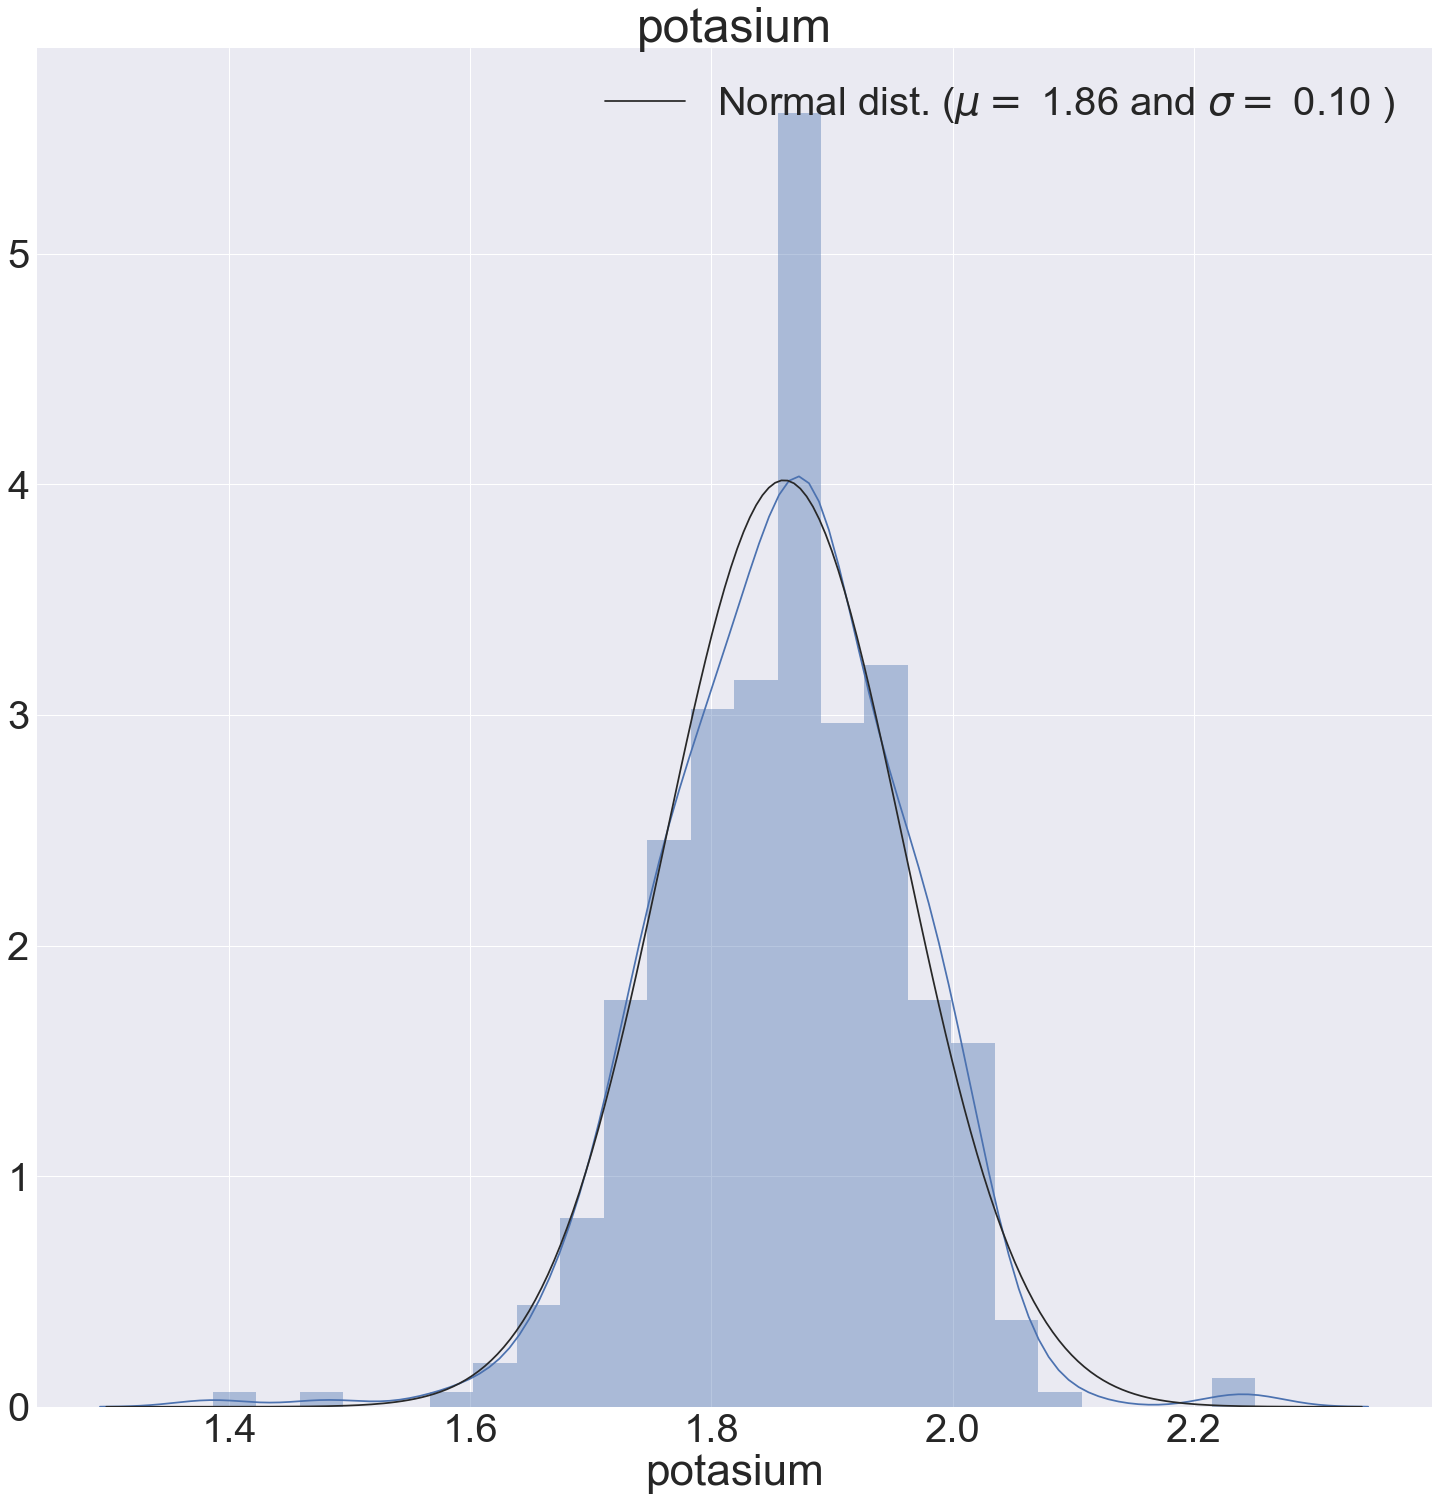

In [30]:
for col in log_cols:
    plt.figure(figsize=(25, 25))
    
    df[col]=np.log1p(df[col]+1)
    
    print(df[col].describe())
    sns.distplot(train(df)[col] , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train(df)[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.title(str(col))
    plt.show()
# %%


# Weight change after imputation and transformation

In [ ]:
sns.set(font_scale=2)
#df1[df1['outcome']==1.0]['this_weight_change_frac'].hist(figsize=(10,10))
df1[df1['outcome']==0.0]['this_weight_change_frac'].hist(figsize=(10,10))

# EF after imputation and transformation

In [ ]:
sns.set(font_scale=2)
df[df['outcome']==1.0]['ef'].hist(figsize=(10,10))
#df[df['outcome']==0.0]['ef'].hist(figsize=(10,10))


# Correlation Matrix AFter imputation and transformation

In [ ]:
df1=df[['patient_gender','ef', 'weight', 'this_weight_change_frac', 'weight_change_since_admit_frac', 'bnp', 'this_bnp_change', 'ace','bb','diuretics','anticoagulant','ionotropes', 'other_cardiac_meds', 'bun', 'cr', 'potasium', 'this_cr_change', 'resting_hr', 'systolic', 'diastolic', 'outcome', 'cad/mi', 'heart_failure_unspecfied', 'diastolic_heart_failure', 'systolic_chf', 'atrial_fibrilation', 'cardiomyoapthy', 'lvad', 'chf', 'duration', 'age']]
import seaborn as sns
sns.set(font_scale=8)
corrmat = df1.corr()
plt.subplots(figsize=(60,50))
sns.heatmap(corrmat)